<a href="https://colab.research.google.com/github/Yashvir835/Pytorch-Fire/blob/main/02_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>Basic Machine learning model life cycle is : </center>

![alt text](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)


In [45]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [46]:
torch.__version__

'2.9.0+cpu'

>  In machine learning data is anything which can be converted into numerical number or embedding like table of numbers, images of any kind , videos , audio files , text and many more which you know 🔥.



In [47]:
# creating the training data
weight = 0.7
bias = 0.3

start = 0
end  = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [48]:
# create train/test split

train_split = int(0.8*len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [49]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data , test data and compare predictions
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  if predictions is not None:
    # plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14});

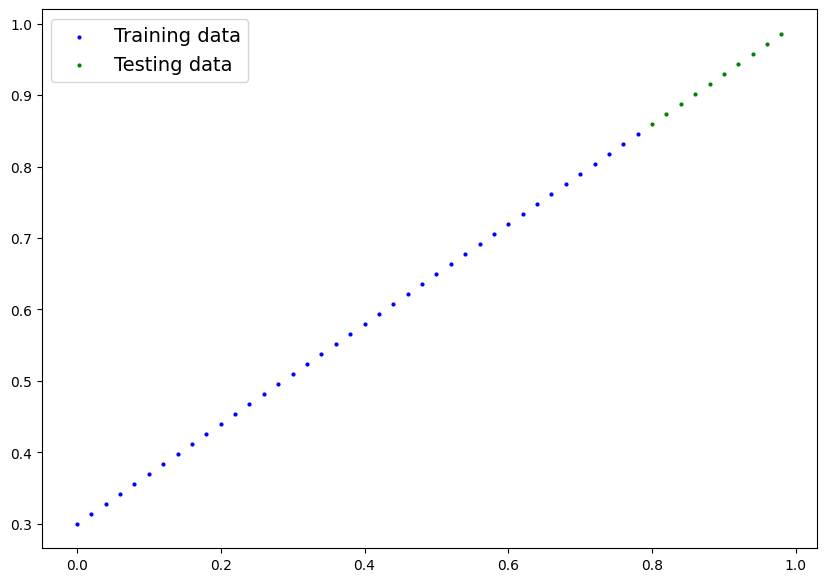

In [50]:
plot_predictions()

In [51]:
# create a linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn( 1,# start with the random weights (this will get adjusted as the model learns)
                                            dtype=torch.float ,
                                            requires_grad=True # this allows us to update the value with gradient descent while back propagation
                                            ))
    self.bias = nn.Parameter(torch.randn(1, # start with the random bias which get updated with each epoch
                                         dtype=torch.float,
                                         requires_grad=True))


  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



In [52]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

```
torch.inference_mode() is used to make the predictions because it turns off the bunch off things like gradient tracking .
```



In [53]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)



In [54]:
# check the predictiosn
print(f"Number of testing smaples : {len(X_test)}")
print(f"Number of predictions made : {len(y_preds)}")
print(f"Predicted values : \n{y_preds}")

Number of testing smaples : 10
Number of predictions made : 10
Predicted values : 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


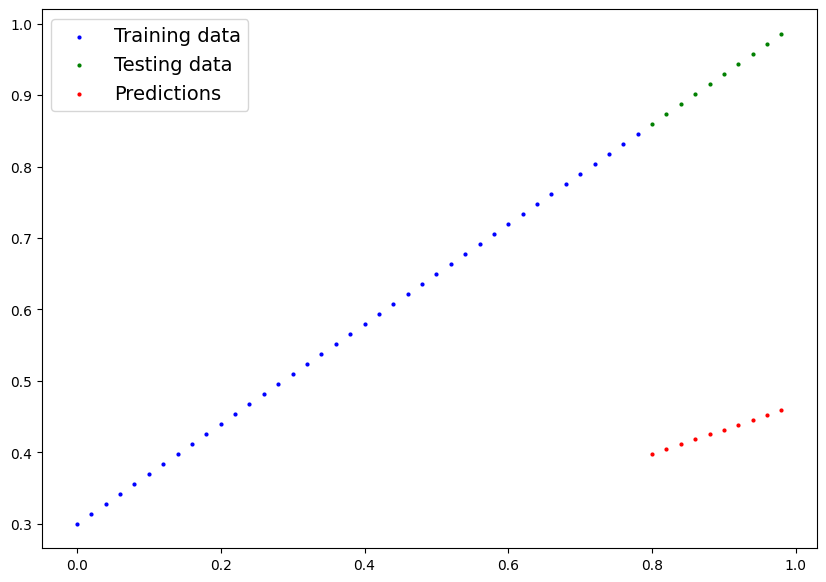

In [55]:
plot_predictions(predictions=y_preds)

In [56]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])



*   Loss function is something which measures how wrong our model predictions are as compared to the true value.
*   Optimizer is something which tells the model how to update the internal parameters to best lower the loss.

* Learning rate is the rate at which optimizer have to update the parameters values. This can be large and small depending on problem or model context but we can aslo use learning rate scheduling .



In [57]:
# create the loss function
loss_fn = nn.L1Loss() # l1 loss and  MAE loss are both same

# create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01 # learning rate define how much the optimizer should change parameters at each step
                            )

In [58]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values =[]
epoch_count = []

for epoch in range(epochs):

  # the training loop started here
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # the testing loop started here

  model_0.eval()

  with torch.inference_mode():

    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    if epoch % 10 ==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch : {epoch} | MAE Train Loss: {loss} | MAE Test Loss : {test_loss}")

Epoch : 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss : 0.48106518387794495
Epoch : 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss : 0.3463551998138428
Epoch : 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss : 0.21729660034179688
Epoch : 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss : 0.14464017748832703
Epoch : 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss : 0.11360953003168106
Epoch : 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss : 0.09919948130846024
Epoch : 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss : 0.08886633068323135
Epoch : 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss : 0.0805937647819519
Epoch : 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss : 0.07232122868299484
Epoch : 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss : 0.06473556160926819


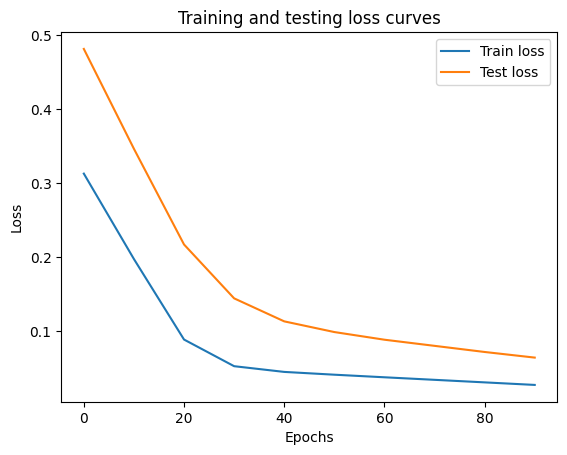

In [59]:
# plot the loss curves

plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [60]:
print(model_0.state_dict())

print(f"weights : {weight} , bias {bias}")

OrderedDict({'weights': tensor([0.5784]), 'bias': tensor([0.3513])})
weights : 0.7 , bias 0.3


In [61]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

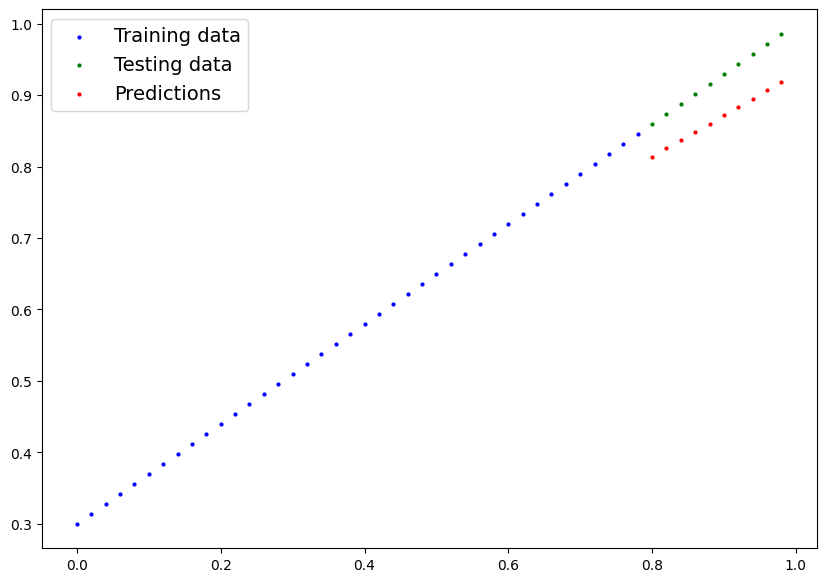

In [62]:
plot_predictions(predictions=y_preds)

In [63]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "02_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to :models/02_pytorch_workflow_model_0.pth


In [64]:
!ls -l models/02_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 2117 Feb  3 09:00 models/02_pytorch_workflow_model_0.pth


In [65]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [66]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [68]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])